In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [2]:
# big_df = pd.read_csv("../datasets/results.csv")
big_df = pd.read_csv("../datasets/final_data/Dataset-V3.csv")


big_df=big_df.replace({"South Korea":"Korea Republic"})
big_df = big_df.replace({"Iran":"IR Iran"})
big_df = big_df.replace({"Soviet Union":"Russia"})
big_df = big_df.replace({"Czechoslovakia":"Czech Republic"})

/home/milad/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
big_df.columns

Index(['Date/Time', 'Score1', 'Score2', 'Team1', 'Team2', 'date_minus_1year',
       'goals_past1', 'goals_past2', 'nb_draws1', 'nb_draws2', 'nb_draws_opp1',
       'nb_draws_opp2', 'nb_losses1', 'nb_losses2', 'nb_losses_opp1',
       'nb_losses_opp2', 'nb_matches1', 'nb_matches2', 'nb_wins1', 'nb_wins2',
       'nb_wins_opp1', 'nb_wins_opp2', 'ratio_draws1', 'ratio_draws2',
       'ratio_draws_opp1', 'ratio_draws_opp2', 'ratio_goals_past1',
       'ratio_goals_past2', 'ratio_losses1', 'ratio_losses2',
       'ratio_losses_opp1', 'ratio_losses_opp2', 'ratio_wins1', 'ratio_wins2',
       'ratio_wins_opp1', 'ratio_wins_opp2'],
      dtype='object')

In [4]:
# big_df.columns = ['home_team', 'away_team', 'Rounds', 'Stadium', 'City', 'Time', 'Day', 'Month',
#        'Year', 'home_score', 'away_score', 'Remarks']


big_df.columns =['Date/Time', 'home_score', 'away_score', 'home_team', 'away_team', 'date_minus_1year',
       'goals_past1', 'goals_past2', 'nb_draws1', 'nb_draws2', 'nb_draws_opp1',
       'nb_draws_opp2', 'nb_losses1', 'nb_losses2', 'nb_losses_opp1',
       'nb_losses_opp2', 'nb_matches1', 'nb_matches2', 'nb_wins1', 'nb_wins2',
       'nb_wins_opp1', 'nb_wins_opp2', 'ratio_draws1', 'ratio_draws2',
       'ratio_draws_opp1', 'ratio_draws_opp2', 'ratio_goals_past1',
       'ratio_goals_past2', 'ratio_losses1', 'ratio_losses2',
       'ratio_losses_opp1', 'ratio_losses_opp2', 'ratio_wins1', 'ratio_wins2',
       'ratio_wins_opp1', 'ratio_wins_opp2']

In [5]:
big_df.head()

,Date/Time,home_score,away_score,home_team,away_team,date_minus_1year,goals_past1,goals_past2,nb_draws1,nb_draws2,...,ratio_goals_past1,ratio_goals_past2,ratio_losses1,ratio_losses2,ratio_losses_opp1,ratio_losses_opp2,ratio_wins1,ratio_wins2,ratio_wins_opp1,ratio_wins_opp2
0,2018-04-01,7,0,Malaysia,Bhutan,2017-04-01,8,2,2,0,...,0.285714,0.074074,0.777778,1.000000,0.0,0.0,0.000000,0.000000,0.0,0.0
1,2018-03-27,2,1,Lebanon,Malaysia,2017-03-27,13,7,1,2,...,0.812500,0.280000,0.000000,0.750000,0.0,1.0,0.833333,0.000000,1.0,0.0
2,2018-03-27,6,0,Switzerland,Panama,2017-03-27,16,21,1,5,...,0.800000,0.567568,0.111111,0.333333,0.0,0.0,0.777778,0.333333,0.0,0.0
3,2018-03-27,2,2,Montenegro,Turkey,2017-03-27,11,13,1,2,...,0.578947,0.481481,0.428571,0.400000,0.0,0.0,0.428571,0.400000,0.0,0.0
4,2018-03-27,1,0,USA,Paraguay,2017-03-27,27,7,7,0,...,0.658537,0.318182,0.117647,0.750000,0.0,0.0,0.470588,0.250000,0.0,0.0


# Compute the Strongness of countries

In [6]:
countries = list(set(big_df["home_team"]).union(set(big_df["away_team"])))
countries_dict = {}
for i in range(len(countries)):
    countries_dict[countries[i]] = []

In [7]:
countries_dict

{'Afghanistan': [],
 'Albania': [],
 'Algeria': [],
 'American Samoa': [],
 'Andorra': [],
 'Angola': [],
 'Anguilla': [],
 'Antigua and Barbuda': [],
 'Argentina': [],
 'Armenia': [],
 'Aruba': [],
 'Australia': [],
 'Austria': [],
 'Azerbaijan': [],
 'Bahamas': [],
 'Bahrain': [],
 'Bangladesh': [],
 'Barbados': [],
 'Belarus': [],
 'Belgium': [],
 'Belize': [],
 'Benin': [],
 'Bermuda': [],
 'Bhutan': [],
 'Bolivia': [],
 'Bonaire': [],
 'Bosnia-Herzegovina': [],
 'Botswana': [],
 'Brazil': [],
 'British Virgin Islands': [],
 'Brunei': [],
 'Bulgaria': [],
 'Burkina Faso': [],
 'Burma': [],
 'Burundi': [],
 'Cambodia': [],
 'Cameroon': [],
 'Canada': [],
 'Cape Verde': [],
 'Cayman Islands': [],
 'Central African Republic': [],
 'Chad': [],
 'Chile': [],
 'China': [],
 'Colombia': [],
 'Comoros': [],
 'Congo': [],
 'Congo DR': [],
 'Cook Islands': [],
 'Costa Rica': [],
 'Croatia': [],
 'Cuba': [],
 'Curaçao': [],
 'Cyprus': [],
 'Czech Republic': [],
 'Denmark': [],
 'Djibouti': []

In [8]:
for i in range (len(big_df['home_team'])):
    total_goal = big_df['home_score'][i]+big_df['away_score'][i]
    if total_goal !=0:
        ratio_home_team = big_df['home_score'][i]/total_goal
        ratio_away_team = big_df['away_score'][i]/total_goal
        
        countries_dict[big_df['home_team'][i]].append(ratio_home_team)
        countries_dict[big_df['away_team'][i]].append(ratio_away_team)

    else:
        countries_dict[big_df['home_team'][i]].append(0)
        countries_dict[big_df['away_team'][i]].append(0)
    


In [9]:
strognes={}
for key in countries_dict.keys():
    print(key ,np.mean(countries_dict[key]))
    strognes.update({key:np.mean(countries_dict[key])})
strognes

Palau 0.183823529412
St Pierre & Miquelon 0.0203081232493
Syria 0.456287202381
Haiti 0.481823680316
Jamaica 0.44344213085
Canada 0.401691153964
Greenland 0.187878787879
Northern Mariana Islands 0.221088435374
Russia 0.579180923867
Bermuda 0.414981684982
Laos 0.269939827783
Brazil 0.651733438001
Mauritius 0.364740476309
Benin 0.358071677055
Australia 0.544038302171
Armenia 0.299968998016
Austria 0.488700148483
IR Iran 0.598985797828
St Martin 0.314919149478
Colombia 0.479212104689
Nigeria 0.537446486478
Algeria 0.491125878626
Ivory Coast 0.555692239859
Gambia 0.338266998342
Kyrgyzstan 0.366056910569
Mongolia 0.269459001038
Germany 0.615954379074
French Guyana 0.399483583388
Taiwan 0.347693384057
England 0.607878931223
Turkmenistan 0.458717660292
Sudan 0.422806033408
Kazakhstan 0.350773809524
Zimbabwe 0.496945452546
Tanzania 0.404358925388
Central African Republic 0.31457641196
Pakistan 0.290806614021
Poland 0.501784937987
Yugoslavia 0.523768845055
Korea DPR 0.497973896816
Libya 0.434549

{'Afghanistan': 0.3660271228232394,
 'Albania': 0.34111897155028148,
 'Algeria': 0.49112587862587859,
 'American Samoa': 0.16375516018373162,
 'Andorra': 0.094784192215699059,
 'Angola': 0.4408344188739326,
 'Anguilla': 0.13928571428571426,
 'Antigua and Barbuda': 0.41175947610373842,
 'Argentina': 0.58500536930769498,
 'Armenia': 0.29996899801587301,
 'Aruba': 0.32036796536796536,
 'Australia': 0.54403830217083227,
 'Austria': 0.48870014848275717,
 'Azerbaijan': 0.27088074167720183,
 'Bahamas': 0.29814814814814816,
 'Bahrain': 0.41325922266139659,
 'Bangladesh': 0.31826007326007327,
 'Barbados': 0.42072202864885794,
 'Belarus': 0.39863505747126438,
 'Belgium': 0.50521562145551357,
 'Belize': 0.25847985347985347,
 'Benin': 0.35807167705507953,
 'Bermuda': 0.41498168498168492,
 'Bhutan': 0.15039517539517538,
 'Bolivia': 0.32055803259720311,
 'Bonaire': 0.35372960372960371,
 'Bosnia-Herzegovina': 0.48363632809445617,
 'Botswana': 0.32802848529592715,
 'Brazil': 0.65173343800067018,
 'Bri

In [10]:
strognes_sorted =sorted(strognes.items(), key=lambda x: x[1],reverse=True)
strognes_sorted

[('Brazil', 0.65173343800067018),
 ('Spain', 0.62107995547366812),
 ('Germany', 0.6159543790739912),
 ('England', 0.60787893122330194),
 ('IR Iran', 0.59898579782790307),
 ('Korea Republic', 0.58579126027921202),
 ('Argentina', 0.58500536930769498),
 ('Croatia', 0.58436535023565739),
 ('Italy', 0.58063046288749609),
 ('Russia', 0.57918092386655251),
 ('Jersey', 0.57380952380952388),
 ('Netherlands', 0.57066957556513687),
 ('Mexico', 0.55694016215598952),
 ('Ivory Coast', 0.55569223985890648),
 ('New Caledonia', 0.5551468325374096),
 ('Portugal', 0.55471146085552858),
 ('Sweden', 0.54864451055167507),
 ('Australia', 0.54403830217083227),
 ('Egypt', 0.5375871123412107),
 ('Nigeria', 0.53744648647785187),
 ('German DR', 0.53736098912273411),
 ('Czech Republic', 0.53709997778561813),
 ('France', 0.53619115452448785),
 ('Japan', 0.53577119326477796),
 ('Serbia', 0.53566566283957584),
 ('Iraq', 0.53464699757313394),
 ('Hungary', 0.53357884179312753),
 ('Ghana', 0.53348188848188849),
 ('China

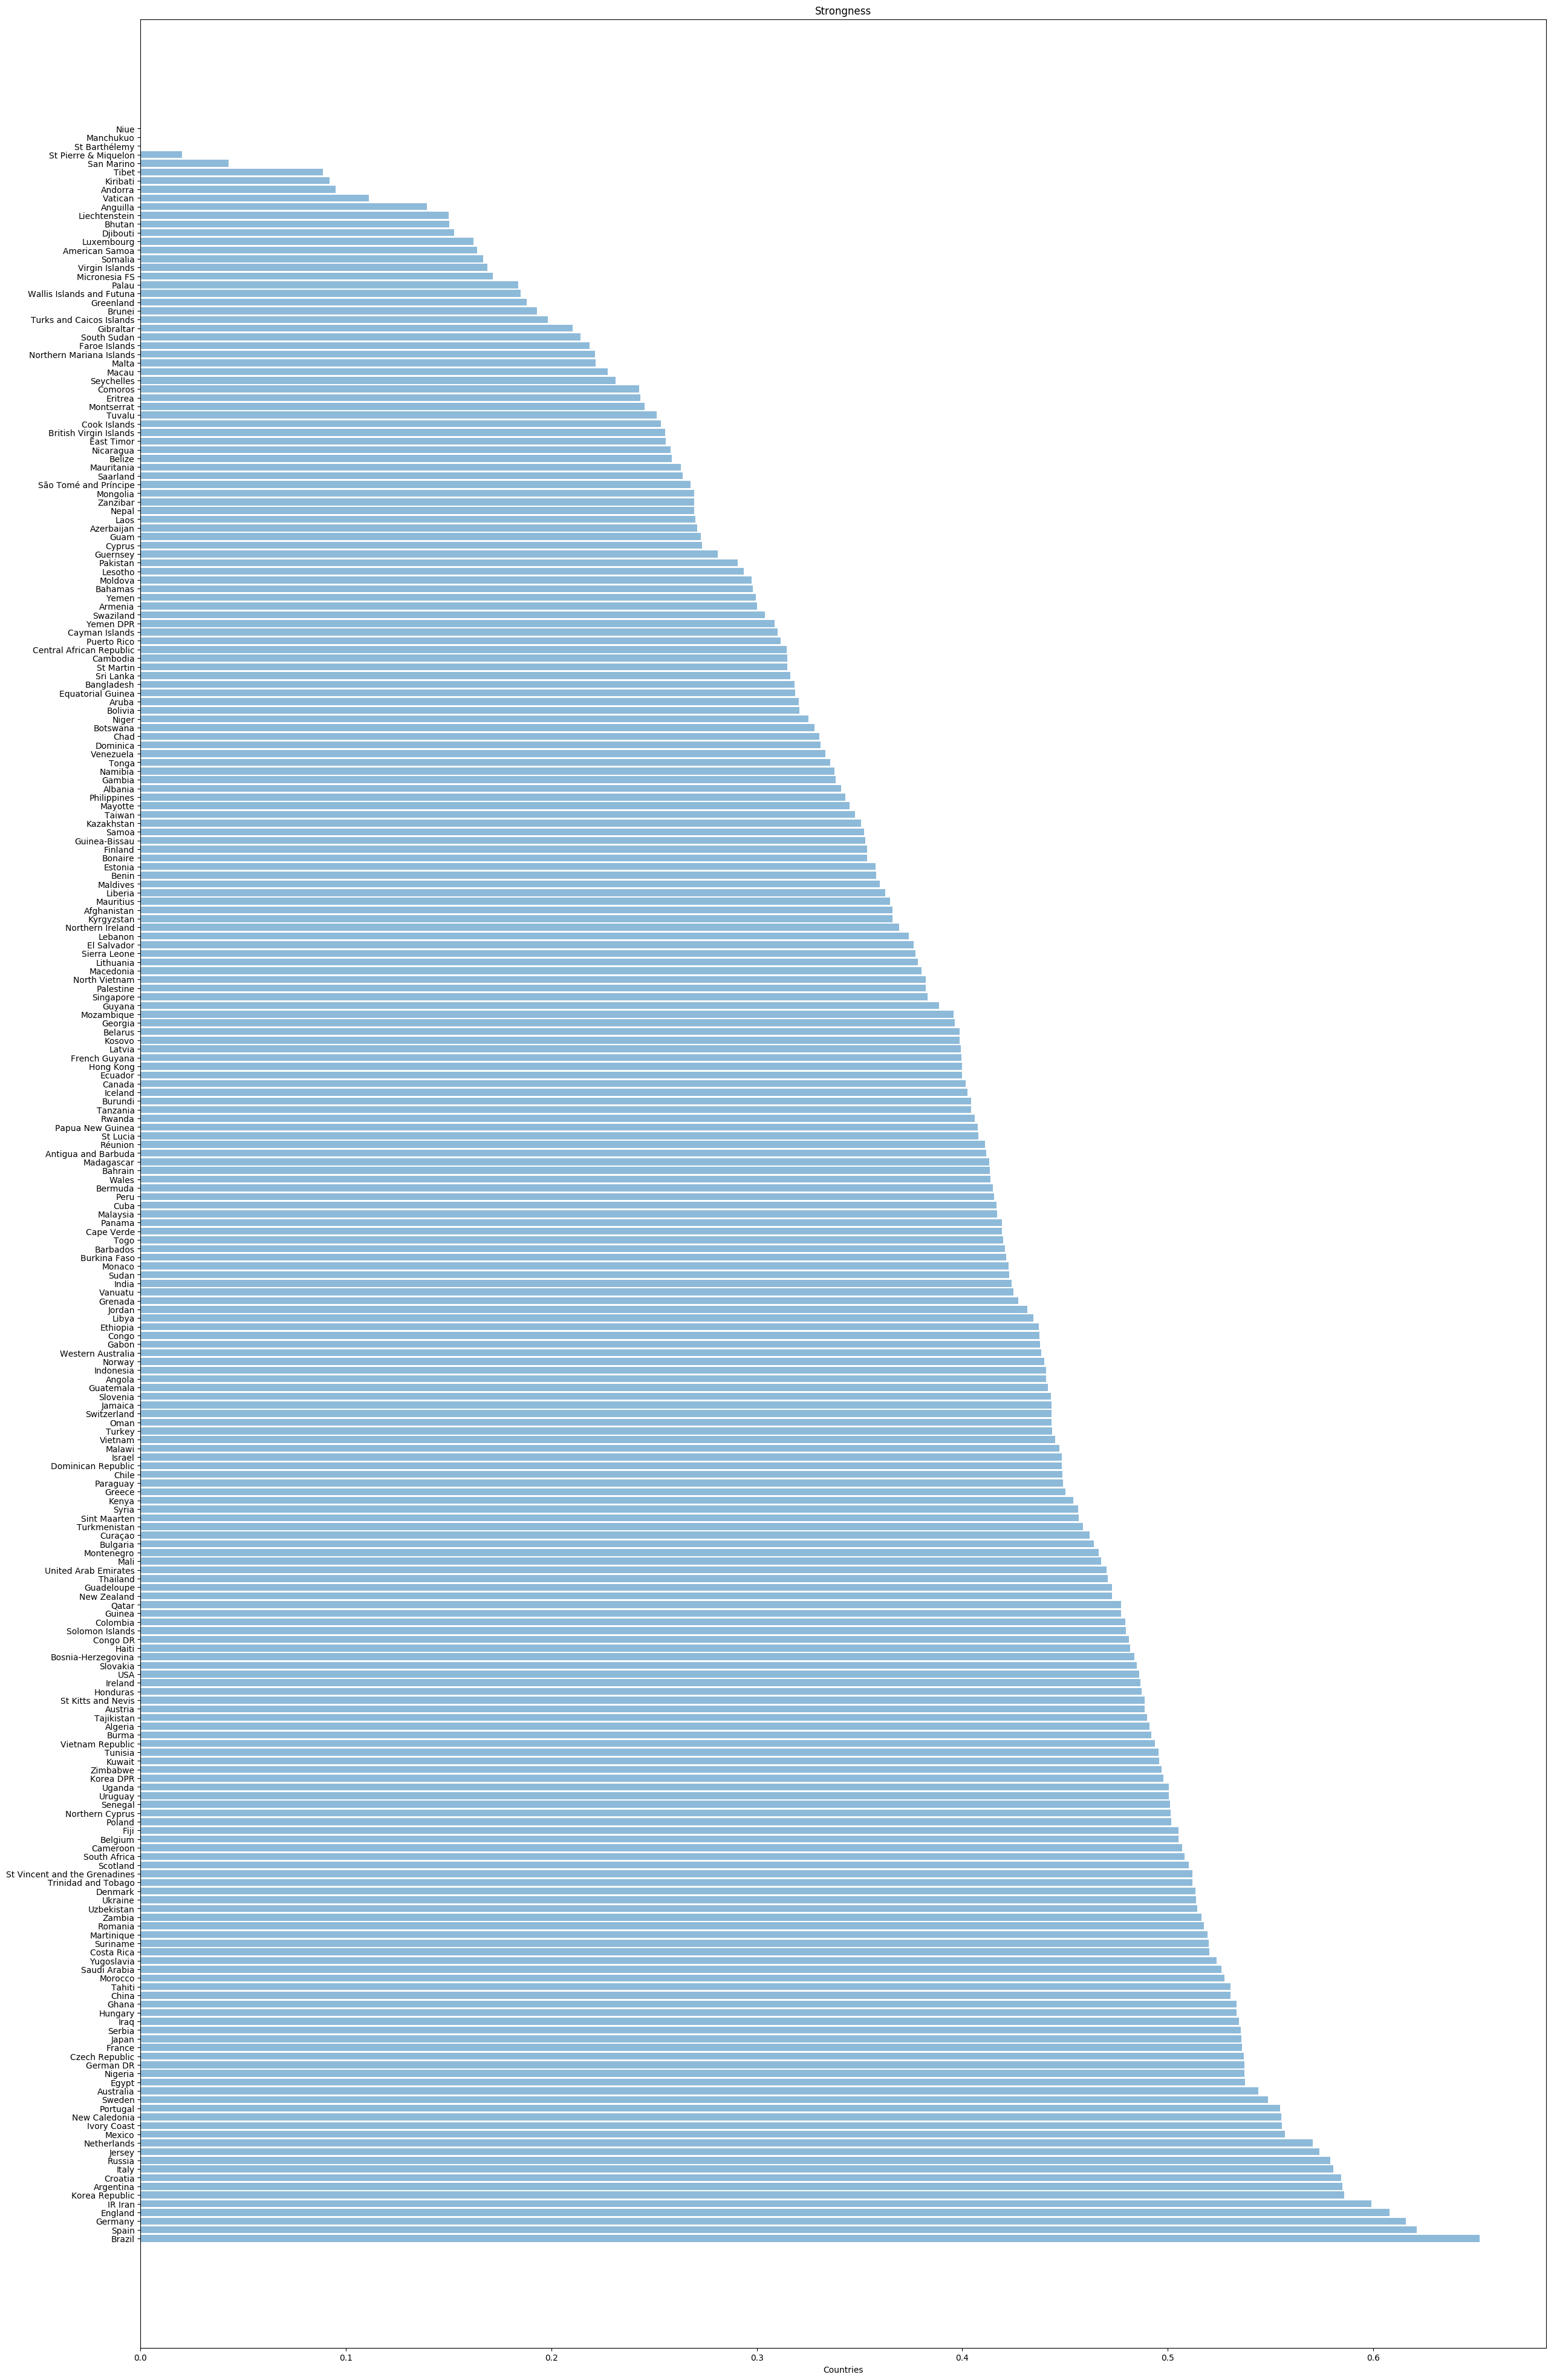

In [18]:
import matplotlib.pyplot as plt; plt.rcdefaults()
from matplotlib.pyplot import figure
figure(num=None, figsize=(30,50), dpi=100, facecolor='w', edgecolor='k')
 
objects = [x[0] for x in strognes_sorted]
y_pos = np.arange(len(objects))
performance = [x[1] for x in strognes_sorted]
 
plt.barh(y_pos, performance, align='center', alpha=0.5)
plt.yticks(y_pos, objects)
plt.xlabel('Countries')
plt.title('Strongness')
 
plt.show()

# Strong / Week Countries by threshold

In [19]:
x_axis =  [x[0] for x in strognes_sorted]
y_axis =  [x[1] for x in strognes_sorted]

def threshold(t,x_axis,y_axis):
    strong=[]
    week =[]
    
    for index, x in enumerate(y_axis):
        if y_axis[index] > t:
            strong.append(x_axis[index])
        else:
            week.append(x_axis[index])
    return strong,week

In [20]:
stron_countries,week_countries = threshold(0.3,x_axis,y_axis)
week_countries

['Armenia',
 'Yemen',
 'Bahamas',
 'Moldova',
 'Lesotho',
 'Pakistan',
 'Guernsey',
 'Cyprus',
 'Guam',
 'Azerbaijan',
 'Laos',
 'Nepal',
 'Zanzibar',
 'Mongolia',
 'São Tomé and Príncipe',
 'Saarland',
 'Mauritania',
 'Belize',
 'Nicaragua',
 'East Timor',
 'British Virgin Islands',
 'Cook Islands',
 'Tuvalu',
 'Montserrat',
 'Eritrea',
 'Comoros',
 'Seychelles',
 'Macau',
 'Malta',
 'Northern Mariana Islands',
 'Faroe Islands',
 'South Sudan',
 'Gibraltar',
 'Turks and Caicos Islands',
 'Brunei',
 'Greenland',
 'Wallis Islands and Futuna',
 'Palau',
 'Micronesia FS',
 'Virgin Islands',
 'Somalia',
 'American Samoa',
 'Luxembourg',
 'Djibouti',
 'Bhutan',
 'Liechtenstein',
 'Anguilla',
 'Vatican',
 'Andorra',
 'Kiribati',
 'Tibet',
 'San Marino',
 'St Pierre & Miquelon',
 'St Barthélemy',
 'Manchukuo',
 'Niue']

## Strong Countries Vs week Countries
strog conuntries by threshhold = 0.6 are 
    -['England', 'Germany', 'Brazil', 'Spain']

In [21]:
strong_df = big_df[(big_df.home_team =='England')|(big_df.home_team =='Germany')|(big_df.home_team =='Brazil')|(big_df.home_team =='Spain')|(big_df.away_team =='England')|(big_df.away_team =='Germany')|(big_df.away_team =='Brazil')|(big_df.away_team =='Spain')]

In [22]:
strong_df.head()

,Date/Time,home_score,away_score,home_team,away_team,date_minus_1year,goals_past1,goals_past2,nb_draws1,nb_draws2,...,ratio_goals_past1,ratio_goals_past2,ratio_losses1,ratio_losses2,ratio_losses_opp1,ratio_losses_opp2,ratio_wins1,ratio_wins2,ratio_wins_opp1,ratio_wins_opp2
10,2018-03-27,1,1,England,Italy,2017-03-27,13,21,3,2,...,0.684211,0.724138,0.111111,0.272727,0.0,0.0,0.555556,0.545455,0.0,0.0
11,2018-03-27,6,1,Spain,Argentina,2017-03-27,30,16,3,3,...,0.810811,0.666667,0.000000,0.200000,0.0,0.0,0.700000,0.500000,0.0,0.0
25,2018-03-27,0,1,Germany,Brazil,2017-03-27,39,19,5,3,...,0.764706,0.863636,0.000000,0.100000,0.0,0.0,0.642857,0.600000,0.0,0.0
82,2018-03-23,0,1,Netherlands,England,2017-03-23,25,14,0,3,...,0.694444,0.700000,0.272727,0.111111,0.0,0.0,0.727273,0.555556,0.0,0.0
88,2018-03-23,0,3,Russia,Brazil,2017-03-23,18,16,4,3,...,0.529412,0.842105,0.363636,0.111111,0.0,0.0,0.272727,0.555556,0.0,0.0


In [23]:
df_compare = strong_df[((strong_df.home_team == "England") |(strong_df.away_team == "England")) &(strong_df.home_score ==strong_df.away_score)]


In [24]:
df_compare.iloc[0]

Date/Time            2018-03-27
home_score                    1
away_score                    1
home_team               England
away_team                 Italy
date_minus_1year     2017-03-27
goals_past1                  13
goals_past2                  21
nb_draws1                     3
nb_draws2                     2
nb_draws_opp1                 0
nb_draws_opp2                 0
nb_losses1                    5
nb_losses2                    6
nb_losses_opp1                0
nb_losses_opp2                0
nb_matches1                   9
nb_matches2                  11
nb_wins1                      5
nb_wins2                      6
nb_wins_opp1                  0
nb_wins_opp2                  0
ratio_draws1           0.333333
ratio_draws2           0.181818
ratio_draws_opp1              0
ratio_draws_opp2              0
ratio_goals_past1      0.684211
ratio_goals_past2      0.724138
ratio_losses1          0.111111
ratio_losses2          0.272727
ratio_losses_opp1             0
ratio_lo

In [27]:
df_compare.shape


(228, 37)

In [26]:
df_compare.to_csv("./temp.csv")
df_compare = pd.read_csv("./temp.csv")

df_compare = df_compare[df_compare['date_minus_1year'].notnull()]

In [28]:
df_compare

,Unnamed: 0,Date/Time,home_score,away_score,home_team,away_team,date_minus_1year,goals_past1,goals_past2,nb_draws1,...,ratio_goals_past1,ratio_goals_past2,ratio_losses1,ratio_losses2,ratio_losses_opp1,ratio_losses_opp2,ratio_wins1,ratio_wins2,ratio_wins_opp1,ratio_wins_opp2
0,10,2018-03-27,1,1,England,Italy,2017-03-27,13,21,3,...,0.684211,0.724138,0.111111,0.272727,0.0,0.0,0.555556,0.545455,0.0,0.0
1,244,2017-11-14,0,0,England,Brazil,2016-11-14,16,19,3,...,0.640000,0.863636,0.200000,0.100000,0.0,0.0,0.500000,0.700000,0.0,0.0
2,300,2017-11-10,0,0,England,Germany,2016-11-10,19,49,2,...,0.678571,0.830508,0.200000,0.000000,1.0,0.0,0.600000,0.800000,0.0,1.0
3,731,2017-06-10,2,2,Scotland,England,2016-06-10,8,14,2,...,0.470588,0.666667,0.333333,0.181818,1.0,0.0,0.333333,0.454545,0.0,1.0
4,1042,2016-11-15,2,2,England,Spain,2015-11-15,21,32,3,...,0.677419,0.780488,0.142857,0.214286,0.0,0.0,0.642857,0.571429,0.0,0.0
5,1184,2016-10-11,0,0,Slovenia,England,2015-10-11,7,21,3,...,0.500000,0.636364,0.333333,0.214286,0.0,0.0,0.333333,0.642857,0.0,0.0
6,1444,2016-06-20,0,0,Slovakia,England,2015-06-20,21,27,4,...,0.583333,0.729730,0.230769,0.153846,0.0,0.0,0.461538,0.769231,0.0,0.0
7,1497,2016-06-11,1,1,England,Russia,2015-06-11,27,21,0,...,0.729730,0.636364,0.166667,0.363636,0.0,0.0,0.833333,0.545455,0.0,0.0
8,2541,2015-06-07,0,0,Ireland,England,2014-06-07,18,22,2,...,0.642857,0.758621,0.250000,0.166667,0.0,0.0,0.500000,0.583333,0.0,0.0
9,2621,2015-03-31,1,1,Italy,England,2014-03-31,14,26,4,...,0.636364,0.764706,0.166667,0.153846,0.0,1.0,0.500000,0.615385,1.0,0.0


In [29]:
nb_draws1 =[]
nb_draws2 =[] 

nb_losses1 = [] 
nb_losses2 = []

nb_wins1 = []  
nb_wins2 = []


for i in range(len(df_compare['home_score'])):
    if df_compare['home_team'][i] == "England":
        nb_draws1.append(df_compare['nb_draws1'])
        nb_losses1.append(df_compare['nb_losses1'])
        nb_wins1.append(df_compare['nb_wins1'])
        
        
        nb_draws2.append(df_compare['nb_draws2'])
        nb_losses2.append(df_compare['nb_losses2'])
        nb_wins2.append(df_compare['nb_wins2'])
        
    else:
        
        nb_draws1.append(df_compare['nb_draws2'])
        nb_losses1.append(df_compare['nb_losses2'])
        nb_wins1.append(df_compare['nb_wins2'])
        
        nb_draws2.append(df_compare['nb_draws1'])
        nb_losses2.append(df_compare['nb_losses1'])
        nb_wins2.append(df_compare['nb_wins1'])
        
        
        
        

In [30]:
nb_draws1_mean = np.mean(nb_draws1)
nb_draws2_mean = np.mean(nb_draws2) 

nb_losses1_mean =np.mean(nb_losses1)
nb_losses2_mean =np.mean(nb_losses2)

nb_wins1_mean = np.mean(nb_wins1)
nb_wins2_mean = np.mean(nb_wins2)


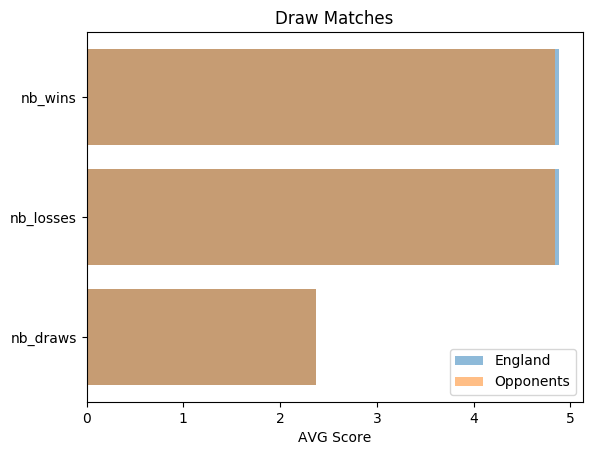

In [31]:
objects = ['nb_draws','nb_losses','nb_wins']
y_pos = np.arange(len(objects))
performance = [nb_draws1_mean, nb_losses1_mean, nb_wins1_mean]
performance1 =[nb_draws2_mean, nb_losses2_mean, nb_wins2_mean]
 
plt.barh(y_pos, performance, align='center', alpha=0.5)
plt.barh(y_pos, performance1,align='center', alpha=0.5)
plt.yticks(y_pos, objects)
plt.xlabel('AVG Score')
plt.title('Draw Matches')
plt.legend(['England','Opponents'])
plt.show()

In [ ]:
big_df[((big_df.home_team =='Armenia') & (big_df.away_team =='Spain'))|((big_df.away_team =='Armenia') &(big_df.home_team == 'Spain'))]


In [ ]:
big_df[((big_df.home_team =='Brazil') & (big_df.away_team =='Spain'))|((big_df.away_team =='Brazil') &(big_df.home_team == 'Spain'))]
